# Stock Market Prediction And Forecasting Using Stacked LSTM

# Author -Kajol Buktare

In [86]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy 
import math
import tensorflow as tf

In [56]:
#Load the dataset by providing it's address
df= pd.read_csv(r'C:\Python\Python36\Lib\site-packages\pandas\io\NSE-TATAGLOBAL.csv')

In [57]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [58]:
df.shape

(2035, 8)

In [59]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [60]:
#first 5 values
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [61]:
#last 5 values
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [62]:
#data types
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [64]:
df1=df.reset_index()['Close']

In [65]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

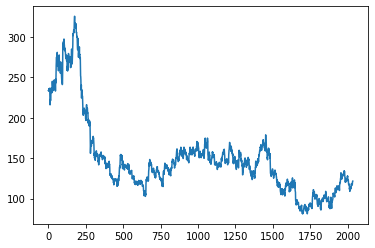

In [66]:
plt.plot(df1)

In [67]:
#Using MinMaxScaler since LSTM are sensitive to the scale of data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [69]:
#Values converted to an array
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [70]:
#splitting of dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [71]:
training_size,test_size

(1322, 713)

In [72]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.25347222],
       [0.26041667],
       [0.2563317 ]])

In [123]:
import numpy
# The array of values will be converted into dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [77]:
# reshaping train and test
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [78]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [79]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [80]:
# LSTM requires paricular input, therefore reshape the input to be [samples, time steps, and features].
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [81]:
#To create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [82]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 16s 323ms/step - loss: 0.0282 - val_loss: 0.0048
Epoch 2/100
20/20 [==============================] - 4s 215ms/step - loss: 0.0032 - val_loss: 9.5974e-04
Epoch 3/100
20/20 [==============================] - 5s 263ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 4/100
20/20 [==============================] - 7s 335ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 5/100
20/20 [==============================] - 5s 266ms/step - loss: 0.0016 - val_loss: 9.6932e-04
Epoch 6/100
20/20 [==============================] - 5s 261ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/100
20/20 [==============================] - 6s 291ms/step - loss: 0.0015 - val_loss: 9.9970e-04
Epoch 8/100
20/20 [==============================] - 7s 332ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 9/100
20/20 [==============================] - 6s 302ms/step - loss: 0.0012 - val_loss: 8.3990e-04
Epoch 10/100
20/20 [==============================] - 9s 462ms/step - loss

In [87]:
tf.__version__

'2.6.2'

In [88]:
#Let's make a prediction and look at the performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [89]:
##Transform to original state
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [90]:
#Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

166.0576703300899

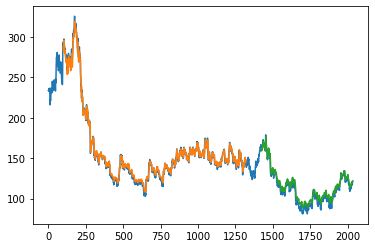

In [91]:
#Plotting (for plotting we have to shift train predictions)
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift train predictions and plot baseline and predictions
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [92]:
len(test_data)

713

In [93]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 372)

In [94]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [95]:
temp_input

[0.048815359477124176,
 0.048815359477124176,
 0.05310457516339867,
 0.049632352941176405,
 0.05065359477124176,
 0.05126633986928103,
 0.049632352941176405,
 0.05902777777777779,
 0.055555555555555525,
 0.040849673202614345,
 0.037377450980392135,
 0.037377450980392135,
 0.026552287581699308,
 0.02879901960784309,
 0.03165849673202614,
 0.03165849673202614,
 0.036356209150326724,
 0.022058823529411742,
 0.016748366013071836,
 0.014501633986928053,
 0.022263071895424813,
 0.03615196078431371,
 0.02675653594771238,
 0.03206699346405223,
 0.02696078431372545,
 0.035743464052287566,
 0.03594771241830064,
 0.0404411764705882,
 0.039215686274509776,
 0.044117647058823484,
 0.029820261437908446,
 0.012254901960784326,
 0.012867647058823484,
 0.011437908496731986,
 0.0024509803921567985,
 0.005923202614379064,
 0.0,
 0.007148692810457491,
 0.0042892156862744946,
 0.006740196078431349,
 0.006331699346405206,
 0.011233660130718914,
 0.019607843137254888,
 0.02757352941176472,
 0.030024509803921

In [110]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=371
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.02144608 0.04840686 0.04575163 0.03962418 0.03921569 0.04758987
 0.04513889 0.04166667 0.04125817 0.05044935 0.05555556 0.05494281
 0.05412582 0.0435049  0.04799837 0.05147059 0.05065359 0.03431373
 0.04575163 0.04187092 0.04554739 0.03941993 0.02716503 0.03125
 0.05882353 0.07148693 0.08721405 0.08986928 0.10498366 0.08905229
 0.10355392 0.10375817 0.12275327 0.10906863 0.09660948 0.1064134
 0.10457516 0.11049837 0.1127451  0.09803922 0.09987745 0.08925654
 0.0747549  0.08169935 0.08925654 0.09068627 0.08129085 0.08823529
 0.08455882 0.07945261 0.08374183 0.07781863 0.09824346 0.09089052
 0.09007353 0.09558824 0.06862745 0.06372549 0.0494281  0.04799837
 0.04534314 0.0443219  0.03941993 0.0379902  0.04656863 0.05085784
 0.07209967 0.06535948 0.07230392 0.07802288 0.07741013 0.06086601
 0.06413399 0.07046569 0.05412582 0.0498366  0.05167484 0.05330882
 0.0435049  0.02634804 0.02410131 0.02961601 0.01960784 0.02961601
 0.04575163 0.05923203 0.06678922 0.06229575 0.0631127

In [111]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [112]:
len(df1)

2035

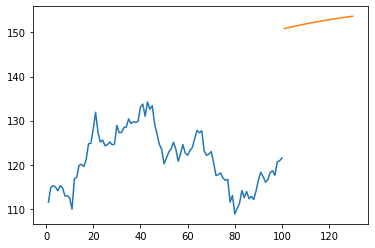

In [114]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

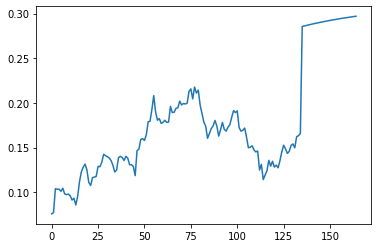

In [118]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1900:])

In [116]:
df3=scaler.inverse_transform(df3).tolist()

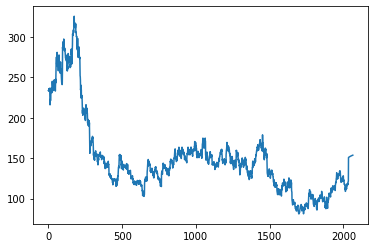

In [117]:
plt.plot(df3)